In [14]:
import pandas as pd
import numpy as np
import pickle
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
training_file = pd.read_csv("train.csv")
testing_file = pd.read_csv("test.csv")

In [3]:
training_file.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [4]:
testing_file.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,453.584121,0.425474,0.503637,0.517288,0.464096
std,257.804948,0.136079,0.158552,0.171727,0.179659
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,239.000000,0.329383,0.393987,0.388189,0.338964
50%,445.000000,0.421989,0.510065,0.520220,0.461294
75%,670.000000,0.519024,0.605957,0.644824,0.584448
max,899.000000,1.000000,1.000000,0.999841,1.000000


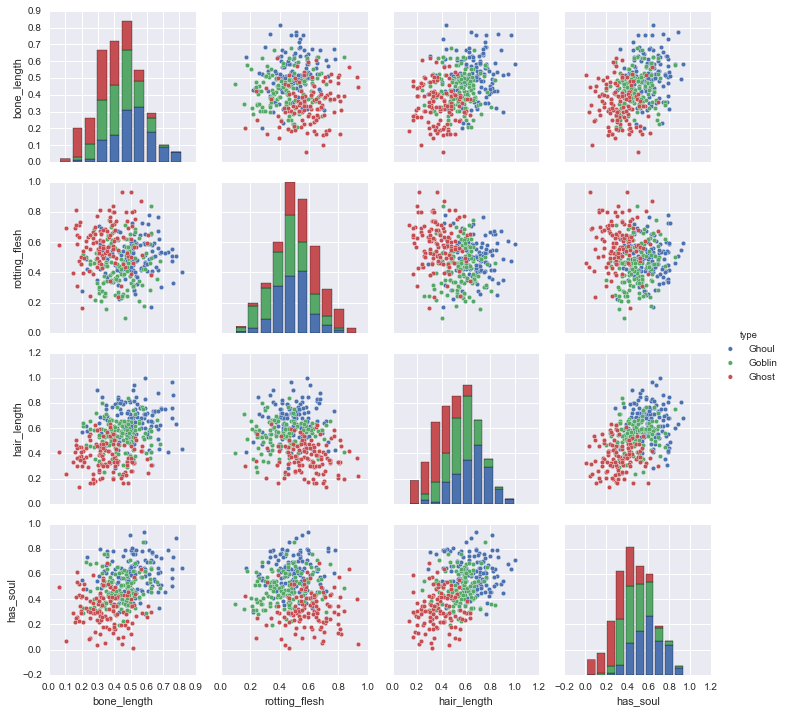

In [5]:
import seaborn as sns
sns.set()
%matplotlib inline
sns.pairplot(training_file[['bone_length','rotting_flesh','hair_length','has_soul','type']],hue='type')

## Creating Additional Features

In [6]:
training_file['hair_soul'] = training_file.apply(lambda row: row['hair_length'] * row['has_soul'],axis=1)
training_file['hair_bone'] = training_file.apply(lambda row: row['hair_length'] * row['bone_length'],axis=1)
training_file['bone_soul'] = training_file.apply(lambda row: row['bone_length'] * row['has_soul'],axis=1)
training_file['hair_bone_soul'] = training_file.apply(lambda row: row['hair_length'] * row['bone_length'] * 
                                                      row['has_soul'],axis=1)

testing_file['hair_soul'] = testing_file.apply(lambda row: row['hair_length'] * row['has_soul'],axis=1)
testing_file['hair_bone'] = testing_file.apply(lambda row: row['hair_length'] * row['bone_length'],axis=1)
testing_file['bone_soul'] = testing_file.apply(lambda row: row['bone_length'] * row['has_soul'],axis=1)
testing_file['hair_bone_soul'] = testing_file.apply(lambda row: row['hair_length'] * row['bone_length'] * 
                                                      row['has_soul'],axis=1)

In [9]:
training_file.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,hair_soul,hair_bone,bone_soul,hair_bone_soul
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,0.363825,0.165118,0.276924,0.128980
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin,0.233763,0.305853,0.253188,0.134545
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,0.642171,0.379735,0.370195,0.300456
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul,0.563196,0.494546,0.686921,0.437408
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost,0.266409,0.236973,0.360298,0.150818


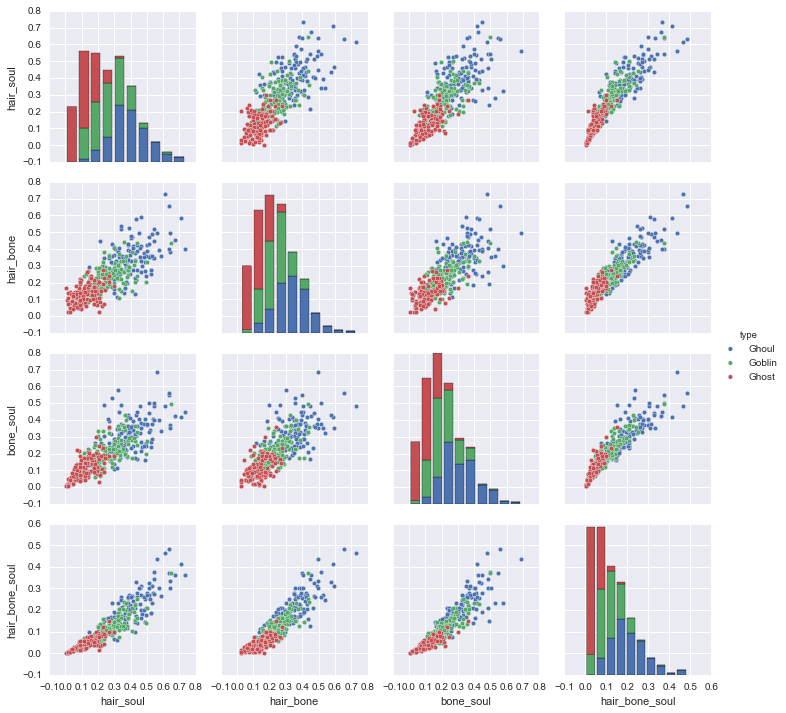

In [10]:
sns.pairplot(training_file[['hair_soul','hair_bone','bone_soul','hair_bone_soul','type']],hue='type')

## Creating DataFrames

In [11]:
train_all_features = training_file[['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone',
                                   'bone_soul','hair_bone_soul']]
train_old_features = training_file[['bone_length','rotting_flesh','hair_length','has_soul']]
train_with_hair_soul = training_file[['bone_length','rotting_flesh','hair_length','has_soul','hair_soul']]
labels = training_file[['type']]

test_all_features = testing_file[['bone_length','rotting_flesh','hair_length','has_soul','hair_soul','hair_bone',
                                   'bone_soul','hair_bone_soul']]
test_old_features = testing_file[['bone_length','rotting_flesh','hair_length','has_soul']]
test_with_hair_soul = testing_file[['bone_length','rotting_flesh','hair_length','has_soul','hair_soul']]
test_id = testing_file[['id']]

## Creating Set of Classifiers

In [12]:
clfs = {}

# clfs ['lg'] = {'clf' : LogisticRegression(), 'name' : 'LogisticRegression'}
# clfs ['rfc'] = {'clf' : RandomForestClassifier(n_estimators=22,n_jobs=-1), 'name' : 'RandomForest'}
clfs['dt'] = {'clf' : DecisionTreeClassifier(), 'name' : 'DecisionTree'}
# clfs['knn'] = {'clf' : KNeighborsClassifier(n_neighbors=4), 'name' : 'KnearestNeighbors'}
# clfs['svc'] = {'clf' : SVC(kernel='linear'), 'name' : 'SupportVectorClassifier'}
clfs['nusvc'] = {'clf' : NuSVC(), 'name' : 'NuSVC'}
clfs['linearSVC'] = {'clf' : LinearSVC(), 'name' : 'LinearSVC'}
clfs['SGD'] = {'clf' : SGDClassifier() , 'name' : 'SGDClassifier'}
clfs['GPC'] = {'clf' : GaussianProcessClassifier(), 'name' : 'Gaussian Process'}
clfs['NB'] = {'clf' : GaussianNB(), 'name' : 'NaiveBayes'}
clfs['bag'] = {'clf' : BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
               'name': "BaggingClassifier"}
clfs['gbc'] = {'clf' : GradientBoostingClassifier(), 'name' : 'GradientBoosting'}
# clfs['mlp'] = {'clf': MLPClassifier(hidden_layer_sizes=(100,100,100), alpha=1e-5, solver='lbgfs', max_iter=500),
# 'name': 'MultilayerPerceptron'}

## Find the best parameters using Grid Search

Using GridSearch you can find the best parameters for a classifier. You just have to give an array for each parameter and GridSearch will try out every combination. That takes a lot longer to compute of course.

In [34]:
# 1 MlP 
parameters_mlp = {'hidden_layer_sizes' : np.arange(5,12),'solver':['lbgfs'],'activation':['identity','logistic','tanh','relu'],
                 'max_iter':[1500],'alpha':10.0 ** -np.arange(1,7)}
clfs['mlpGrid'] = {'clf' : GridSearchCV(MLPClassifier(),parameters_mlp),'name':'MLP with Grid Search'}

# 2 SVC 
parameters_svc = {'kernel':['linear','poly','sigmoid','rbf'],'gamma':np.linspace(0.0,2.0,num=21),'C':np.linspace(.5,1.5,num=11)}
clfs['svcGrid'] = {'clf' : GridSearchCV(SVC(),parameters_svc),'name':'SVC with Grid Search'}

# 3 Random forest
parameters_rfc = {'n_estimators':[20,50,100],'max_depth':[4,None],'max_features':[2,4],
                  'criterion':['gini','entropy'],'min_samples_split': [1, 3, 10],'min_samples_leaf': [1, 3, 10],
                  'bootstrap':[True,False]}
clfs['rfcGrid'] = {'clf': GridSearchCV(RandomForestClassifier(),parameters_rfc),'name':'Random Forest with Grid Search'}

# 4 KNN
parameters_knn = {'n_neighbors':np.arange(3,12),'weights':['distance','uniform']}
clfs['knnGrid'] = {'clf': GridSearchCV(KNeighborsClassifier(),parameters_knn),'name':'KNearest Neighbor with Grid Search'}

# 5 logistic regression
parameters_lg = {'C':[1],'tol':[0.0001],'solver': ['newton-cg','lbfgs'], 'multi_class': ['multinomial']}
clfs['lgGrid'] = {'clf': GridSearchCV(LogisticRegression(),parameters_lg),'name':'Logistic Regression with Grid Search'}


parameters_adaBoost = {'n_estimators':np.arange(3, 12)}
clfs['adagrid'] = {'clf': GridSearchCV(AdaBoostClassifier(), parameters_adaBoost), 'name': 'AdaBoost with GridSearch'}



# # 6 Decision tree    
# parameters_dt = {'max_depth':[4,None],'max_features':[3,5,8],'criterion':['gini','entropy'],
#                   'min_samples_split': [1, 3, 10],'min_samples_leaf': [1, 3, 10]}
# clfs['dtGrid'] = {'clf': GridSearchCV(DecisionTreeClassifier(),parameters_dt),'name' : 'Decision tree with Grid Search'}
                 
# # 7 Linear SVC    
# parameters_linearSVC = {'loss':['hinge','squared_hinge'],'C':[1]}
# clfs['linearsvcGrid'] = {'clf': GridSearchCV(LinearSVC(),parameters_linearSVC),'name':'Linear SVC with Grid Search'}
              
# # 8 NuSVC
# parameters_nuSVC = {'kernel':['linear','poly','sigmoid','rbf'],'gamma':np.linspace(0.0,2.0,num=21)}
# clfs['nusvcGrid'] = {'clf': GridSearchCV(NuSVC(),parameters_nuSVC),'name':'NuSVC with Grid Search'}

# # 9 Naive Bayes
# parameters_nb = {}
# clfs['nbGrid'] = {'clf': GridSearchCV(GaussianNB(),parameters_nb),'name':'Naive Bayes with Grid Search'}

# # 10 gaussian process
# parameters_GPC = {}
# clfs['gpcGrid'] = {'clf': GridSearchCV(GaussianProcessClassifier(),parameters_GPC),'name':'Gaussian Process with Grid Search'}

# # 11 SGD
# parameters_SGD = {}
# clfs['sgdGrid'] = {'clf': GridSearchCV(SGDClassifier(),parameters_SGD),'name':'SGD with Grid Search'}
# # 12 bagging
# parameters_bag = {'n_estimators':np.arange(64,1024,step=64),'max_features':[3,5,8],'bootstrap':[True,False]}
# clfs['bagGrid'] = {'clf': GridSearchCV(BaggingClassifier(),parameters_bag),'name':'Bagging with Grid Search'}

# # 13 Gradient Boosting
# parameters_gbc = {'n_estimators':np.arange(64,1024,step=64),'max_depth':[4,None],'max_features':[3,5,8],
#                   'criterion':['friedman_mse','mse','mae'],'min_samples_split': [1, 3, 10],'min_samples_leaf': [1, 3, 10],
#                   'loss':['deviance','exponential']}
# clfs['gbcGrid'] = {'clf': GridSearchCV(GradientBoostingClassifier(),parameters_gbc),'name':'Gradient Boosting with Grid Search'}

In [22]:
for clf in clfs:
    clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'],train_old_features,labels.values.ravel(),cv=10)
    print(clfs[clf]['name'] + " : %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(),clfs[clf]['score'].std()*2))
    
    clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'],train_with_hair_soul,labels.values.ravel(),cv=10)
    print(clfs[clf]['name'] + "(with hair_soul feature) : %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(),clfs[clf]['score'].std()*2))

DecisionTree : 0.6545 (+/- 0.1574)
DecisionTree(with hair_soul feature) : 0.6552 (+/- 0.1231)
Gaussian Process : 0.7410 (+/- 0.1057)
Gaussian Process(with hair_soul feature) : 0.7326 (+/- 0.1129)
AdaBoost with GridSearch : 0.6820 (+/- 0.1470)
AdaBoost with GridSearch(with hair_soul feature) : 0.6709 (+/- 0.1170)
NuSVC : 0.7328 (+/- 0.1545)
NuSVC(with hair_soul feature) : 0.7272 (+/- 0.1369)
LinearSVC : 0.7275 (+/- 0.1027)
LinearSVC(with hair_soul feature) : 0.7408 (+/- 0.0937)
SGDClassifier : 0.6495 (+/- 0.1467)
SGDClassifier(with hair_soul feature) : 0.6804 (+/- 0.1621)
Logistic Regression with Grid Search : 0.7515 (+/- 0.1135)
Logistic Regression with Grid Search(with hair_soul feature) : 0.7487 (+/- 0.0863)
MLP with Grid Search : 0.7380 (+/- 0.1294)
MLP with Grid Search(with hair_soul feature) : 0.7102 (+/- 0.2163)
BaggingClassifier : 0.6786 (+/- 0.1176)
BaggingClassifier(with hair_soul feature) : 0.6925 (+/- 0.1682)
SVC with Grid Search : 0.7623 (+/- 0.1190)
SVC with Grid Search(wi

## Saving the trained models

In [44]:
for clf in clfs:
    pickle.dump(clfs[clf]['clf'],open(clfs[clf]['name'],"wb"))


## Create voting classifiers

In [42]:
clfs['vote_hair_soul'] = {'clf' : VotingClassifier(estimators=[
#             ('svcGrid',pickle.load(open(clfs['svcGrid']['name'],"rb"))),
            ('lgGrid',pickle.load(open(clfs['lgGrid']['name'],"rb"))),
            ('NB',pickle.load(open(clfs['NB']['name'],"rb")))],
            voting='soft'), 'name':'Voting Classifier Hair Soul'}


clfs['vote'] = {'clf' : VotingClassifier(estimators=[
#             ('svcGrid',pickle.load(open(clfs['svcGrid']['name'],"rb"))),
            ('lgGrid',pickle.load(open(clfs['lgGrid']['name'],"rb"))),
            ('NB',pickle.load(open(clfs['NB']['name'],"rb")))],
            voting='soft'), 'name':'Voting Classifier'}

## Fit the voting classifiers on the whole training set

In [43]:
clfs['vote_hair_soul']['clf'] = clfs['vote_hair_soul']['clf'].fit(train_with_hair_soul, labels.values.ravel())
clfs['vote']['clf'] = clfs['vote']['clf'].fit(train_old_features, labels.values.ravel())

## Prediction on the test set

In [45]:
clfs['vote_hair_soul']['predictions'] = clfs['vote_hair_soul']['clf'].predict(test_with_hair_soul)
clfs['vote']['predictions'] = clfs['vote']['clf'].predict(test_old_features)

## Create the submission files

In [46]:
predict_vote_hair_soul = pd.DataFrame(clfs['vote_hair_soul']['predictions'])
pd.concat([test_id,predict_vote_hair_soul],axis=1).rename(columns={0:'type'}).to_csv("submission" + 
                    clfs['vote_hair_soul']['name'] + ".csv",index=False)

predict_vote = pd.DataFrame(clfs['vote']['predictions'])
pd.concat([test_id,predict_vote],axis=1).rename(columns={0:'type'}).to_csv("submission" + 
                    clfs['vote']['name'] + ".csv",index=False)